In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4yX2MtnF_u2b9dbI4adw1k7Tc4KrAF1k_tfzJvyobkgVGLt2tWIHc
Mounted at /content/drive


In [3]:
hyundi = pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/hyundi.csv')

In [4]:
#hyundi= pd.read_csv(r'C:\Users\valec\Desktop\hyundi.csv')

In [5]:
hyundi.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [6]:
hyundi.shape

(4860, 9)

In [7]:
hyundi.info

<bound method DataFrame.info of         model  year  price transmission  ...  fuelType tax(£)   mpg  engineSize
0         I20  2017   7999       Manual  ...    Petrol    145  58.9         1.2
1      Tucson  2016  14499    Automatic  ...    Diesel    235  43.5         2.0
2      Tucson  2016  11399       Manual  ...    Diesel     30  61.7         1.7
3         I10  2016   6499       Manual  ...    Petrol     20  60.1         1.0
4        IX35  2015  10199       Manual  ...    Diesel    160  51.4         2.0
...       ...   ...    ...          ...  ...       ...    ...   ...         ...
4855      I30  2016   8680       Manual  ...    Diesel      0  78.4         1.6
4856      I40  2015   7830       Manual  ...    Diesel     30  65.7         1.7
4857      I10  2017   6830       Manual  ...    Petrol     20  60.1         1.0
4858   Tucson  2018  13994       Manual  ...    Petrol    145  44.8         1.6
4859   Tucson  2016  15999    Automatic  ...    Diesel    125  57.6         1.7

[4860 r

In [8]:
hyundi.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [9]:
sum(hyundi.duplicated())

86

In [10]:
hyundi.loc[:, hyundi.isnull().any()].columns
hyundi2 = hyundi.drop_duplicates() #drop duplicate arrows

In [11]:
sum(hyundi2.duplicated())

0

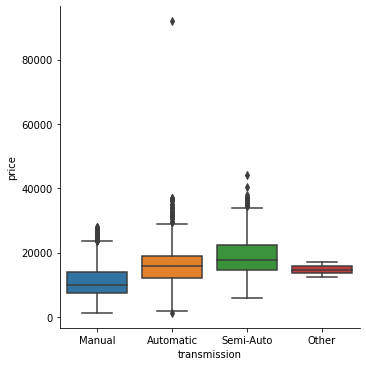

In [12]:
H = sns.catplot(x="transmission", y="price", kind="box", data= hyundi2) #Transmission (T) Vs Price

In [13]:
print(hyundi2['transmission'])

0          Manual
1       Automatic
2          Manual
3          Manual
4          Manual
          ...    
4855       Manual
4856       Manual
4857       Manual
4858       Manual
4859    Automatic
Name: transmission, Length: 4774, dtype: object


In [14]:
hyundi2.loc[:, ['transmission', 'price']]

,transmission,price
0,Manual,7999
1,Automatic,14499
2,Manual,11399
3,Manual,6499
4,Manual,10199
...,...,...
4855,Manual,8680
4856,Manual,7830
4857,Manual,6830
4858,Manual,13994


In [15]:
AT = hyundi2.loc[hyundi2['transmission'] == 'Automatic', ['transmission', 'price']]
MT = hyundi2.loc[hyundi2['transmission'] == 'Manual', ['transmission', 'price']]
SA = hyundi2.loc[hyundi2['transmission'] == 'Semi-Auto', ['transmission', 'price']]

print(AT.shape)
print(MT.shape)
print(SA.shape)
print(hyundi2.shape) #3 cars are 'Other'

(658, 2)
(3546, 2)
(568, 2)
(4774, 9)


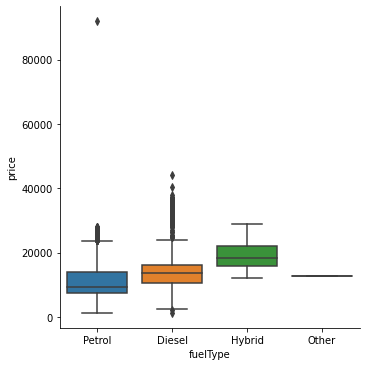

In [16]:
FT = sns.catplot(x="fuelType", y="price", kind="box", data= hyundi2) #FuelType (T) Vs Price

In [17]:
P = hyundi2.loc[hyundi2['fuelType'] == 'Petrol', ['fuelType', 'price']] #Petrol
D = hyundi2.loc[hyundi2['fuelType'] == 'Diesel', ['fuelType', 'price']] #Diesel
H = hyundi2.loc[hyundi2['fuelType'] == 'Hybrid', ['fuelType', 'price']] #Hybrid
E = hyundi2.loc[hyundi2['fuelType'] == 'Electric', ['fuelType', 'price']] #Electric

print(P.shape)
print(D.shape)
print(H.shape)
print(E.shape)

(2838, 2)
(1595, 2)
(340, 2)
(0, 2)


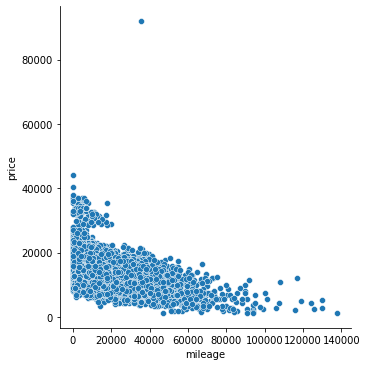

In [18]:
MP =  hyundi2.loc[:, ['mileage', 'price']]
print(sns.relplot(x="mileage", y="price", data=MP))

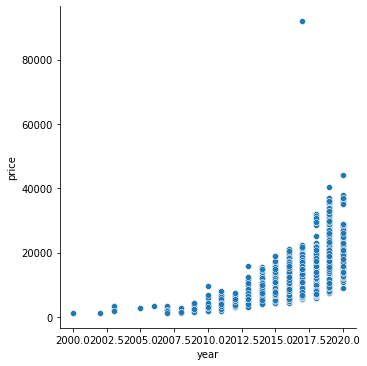

In [19]:
YP =  hyundi2.loc[:, ['year', 'price']]
print(sns.relplot(x="year", y="price", data=YP))

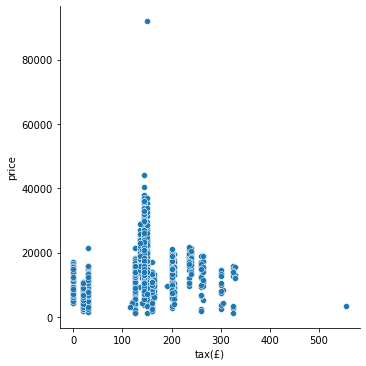

In [20]:
TP =  hyundi2.loc[:, ['tax(£)', 'price']]
print(sns.relplot(x="tax(£)", y="price", data=TP))

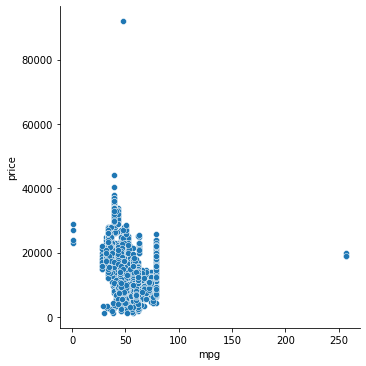

In [21]:
MPP =  hyundi2.loc[:, ['mpg', 'price']]
print(sns.relplot(x="mpg", y="price", data=MPP))

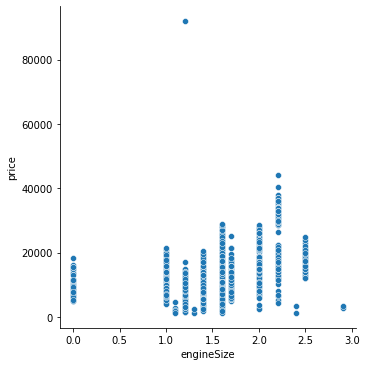

In [22]:
EP =  hyundi2.loc[:, ['engineSize', 'price']]
print(sns.relplot(x="engineSize", y="price", data=EP))

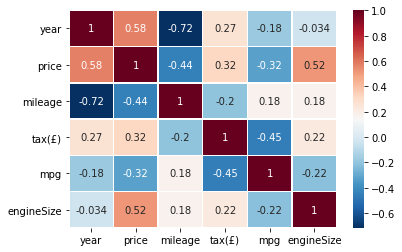

In [23]:
pearsoncorr_hyun = hyundi2.corr(method='pearson') #-1=negat corr 0=no corr +1=positiv corr
sns.heatmap(pearsoncorr_hyun, 
            xticklabels=pearsoncorr_hyun.columns,
            yticklabels=pearsoncorr_hyun.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Machine Learning Part

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR         
from sklearn.feature_selection import SelectKBest, f_regression   
from sklearn.ensemble import RandomForestRegressor   
from sklearn.neural_network import MLPRegressor

In [25]:
hyundi2 = hyundi2[['model','year','transmission','mileage','fuelType','tax(£)','mpg','engineSize','price']]
hyundi2.head()

,model,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,I20,2017,Manual,17307,Petrol,145,58.9,1.2,7999
1,Tucson,2016,Automatic,25233,Diesel,235,43.5,2.0,14499
2,Tucson,2016,Manual,37877,Diesel,30,61.7,1.7,11399
3,I10,2016,Manual,23789,Petrol,20,60.1,1.0,6499
4,IX35,2015,Manual,33177,Diesel,160,51.4,2.0,10199


In [26]:
hyundi2_dummy = pd.get_dummies(hyundi2) ###### dummies.. to have more number of CATEGORICAL features .. indexing
hyundi2_dummy.head()
hyundi2_dummy.shape

(4774, 30)

In [27]:
hyundi2_dummy.head()

,year,mileage,tax(£),mpg,engineSize,price,model_ Accent,model_ Amica,model_ Getz,model_ I10,model_ I20,model_ I30,model_ I40,model_ I800,model_ IX20,model_ IX35,model_ Ioniq,model_ Kona,model_ Santa Fe,model_ Terracan,model_ Tucson,model_ Veloster,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,17307,145,58.9,1.2,7999,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2016,25233,235,43.5,2.0,14499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,2016,37877,30,61.7,1.7,11399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,2016,23789,20,60.1,1.0,6499,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2015,33177,160,51.4,2.0,10199,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [28]:
hyundi2_DS1 =hyundi2_dummy.drop(columns= ['price'])

In [29]:
hyundi2_DS2 = pd.DataFrame(hyundi2_DS1)                                                          
price = hyundi2['price']        
frames = [hyundi2_DS2,price]
hyundi2_DS=pd.concat(frames,axis=1)
print(hyundi2_DS.head())
print(hyundi2_DS.shape)

   year  mileage  tax(£)  ...  fuelType_Other  fuelType_Petrol  price
0  2017    17307     145  ...               0                1   7999
1  2016    25233     235  ...               0                0  14499
2  2016    37877      30  ...               0                0  11399
3  2016    23789      20  ...               0                1   6499
4  2015    33177     160  ...               0                0  10199

[5 rows x 30 columns]
(4774, 30)


In [30]:
hyundi2_DS.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(hyundi2_DS.drop(columns = ['price']),
                                                    hyundi2_DS[['price']],
                                                    test_size = 0.2, random_state = 42)          

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3819, 29)
(3819, 1)
(955, 29)
(955, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

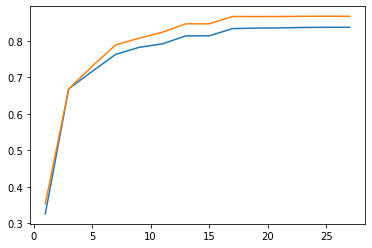

In [33]:

features = hyundi2_DS.drop(columns = ['price']).columns

N = []                                                                        
r_squared_train = []
r_squared_test = []

for k in range(1, 29, 2):                                                       
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [34]:
selector = SelectKBest(f_regression, k = 17)                      ### k= 5 is the point where features of train and test are fitting 
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['year', 'mileage', 'tax(£)', 'mpg', 'engineSize', 'model_ I10',
       'model_ I20', 'model_ IX20', 'model_ Ioniq', 'model_ Santa Fe',
       'model_ Tucson', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [35]:
def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   
    
    return regressor, score

In [36]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.867082
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.363576
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.867212
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.021824
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.935858


In [37]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(3819, 465)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

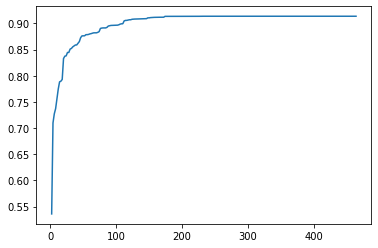

In [38]:
N = []
r_squared = []

for k in range(2, 465, 2): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [39]:
selector = SelectKBest(f_regression, k =200)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.867082
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.363576
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.867212
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.021824
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.935858
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.937176
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",-510.499572
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.944239
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.009369
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.895468


In [40]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)
y_pred = RF.predict(X_test_transformed_poly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [41]:
y_test = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [42]:
Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison.head(100)

,price,Price_prediction
0,10500,14460.219833
1,11230,11005.520000
2,4195,5653.317000
3,18995,17591.514000
4,17149,17069.988000
...,...,...
95,11495,11492.072560
96,14995,15038.056000
97,18680,17700.751000
98,15698,17296.439000


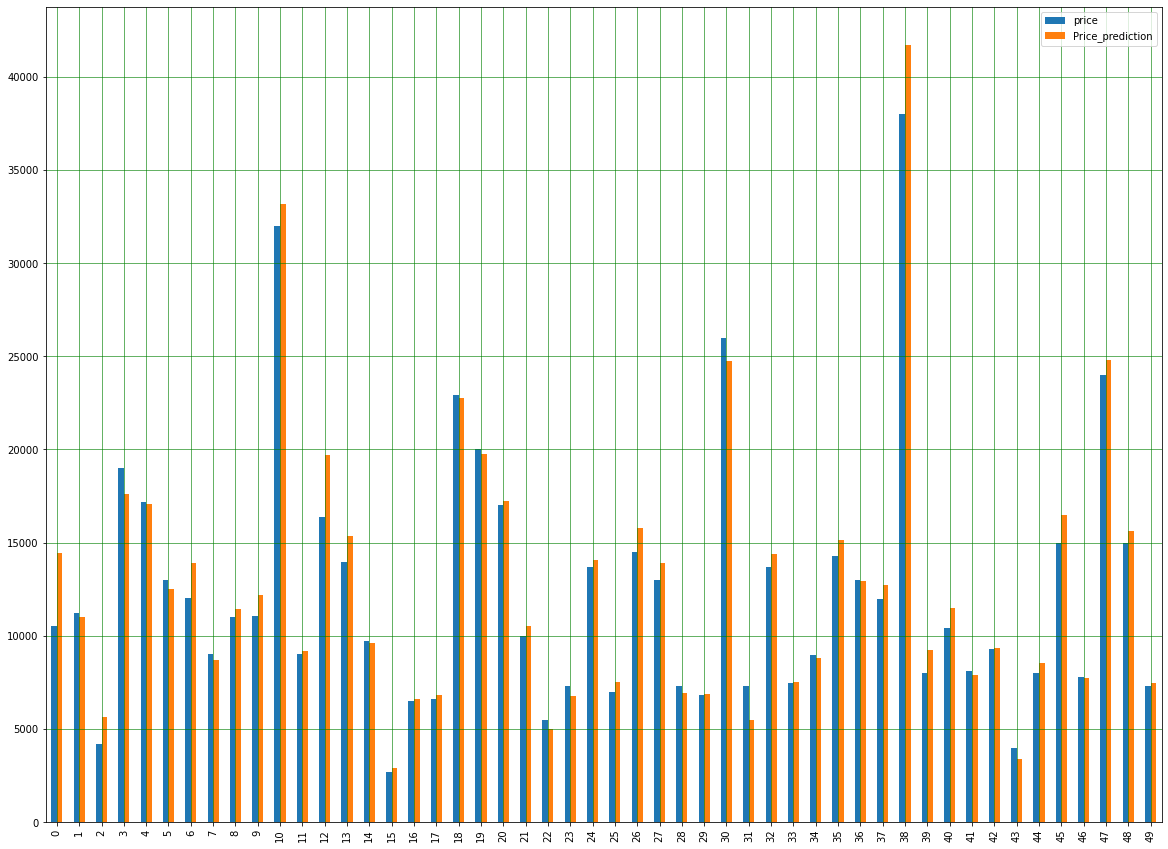

In [43]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

XG Boost 

In [44]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [45]:
model.fit(X_train,y_train)

[11:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [46]:
y_pred=model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.9561732305201636


In [48]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()


,price,Price_prediction
0,10500,11703.624023
1,11230,12173.044922
2,4195,5643.180664
3,18995,17575.089844
4,17149,16914.425781


In [49]:
print(y_pred)

[11703.624  12173.045   5643.1807 17575.09   16914.426  11787.666
 13939.956   8907.013  11703.934  11942.869  32578.533   9251.748
 19384.625  15025.365   9486.492   2443.5667  6873.7314  7143.774
 22536.645  20571.824  16447.686  11373.371   5194.3354  7130.6147
 14018.011   7680.982  13639.758  13846.219   7159.0186  7121.5337
 25882.195   5946.639  14332.01    7371.5205  9429.453  14233.068
 12930.019  12828.742  41894.48    8821.476  12062.253   7496.1084
  9980.803   3605.4932  8840.6    17559.994   7302.358  24818.385
 14338.433   7429.766  11128.934   9533.701  11680.754  13231.545
  5607.272   8962.687  11517.964   6717.518   8733.39   16290.831
  8181.799  21828.719  17546.945  11152.667  14431.     15124.466
 14356.15    8062.6826 13324.669  17897.418   7443.9717 15422.197
  5733.407  14760.763  16772.52    7749.869  16830.938  13091.489
 11882.918  19800.889   9419.796  10538.198   9152.192  12927.989
  8503.666   7304.4824 15423.43   13953.442   9511.472  27516.625
 15879.